
# Predicting Reliable Lender

[LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. 

Data source: [here](https://www.lendingclub.com/info/download-data.action).

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

In [384]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [385]:
loans = pd.read_csv('loan_data.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [386]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [387]:
loans.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [388]:
loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

# Exploratory Data Analysis

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

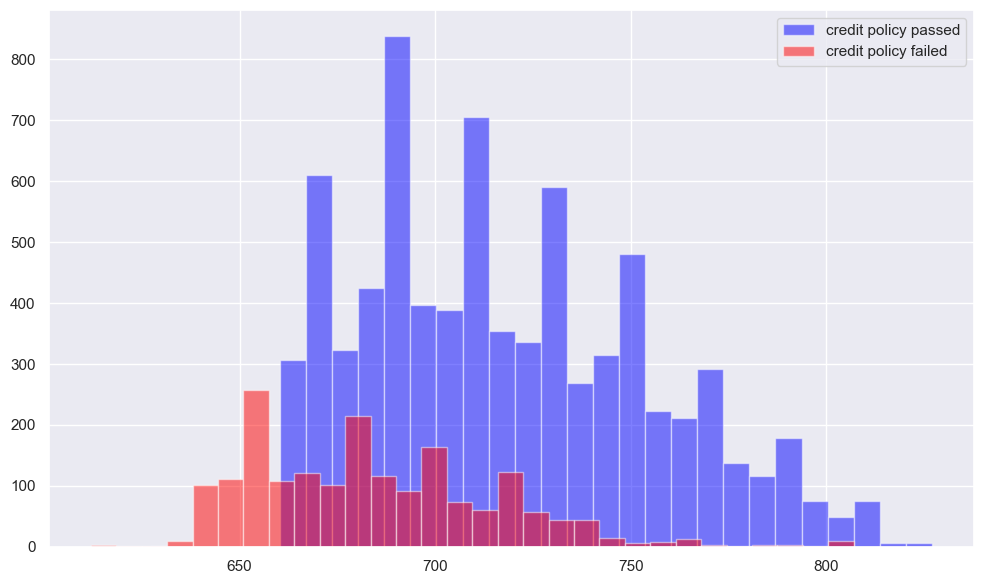

In [389]:
sns.set()
plt.figure(figsize=(10,6))
ax = loans[loans['credit.policy'] == 1]['fico'].hist(bins=30,color='Blue', alpha=0.5, label='credit policy passed')
loans[loans['credit.policy'] == 0]['fico'].hist(bins=30, ax=ax, color='Red',alpha=0.5, label='credit policy failed')
plt.legend()
plt.tight_layout()

**Similarly for selected by the not.fully.paid column.**

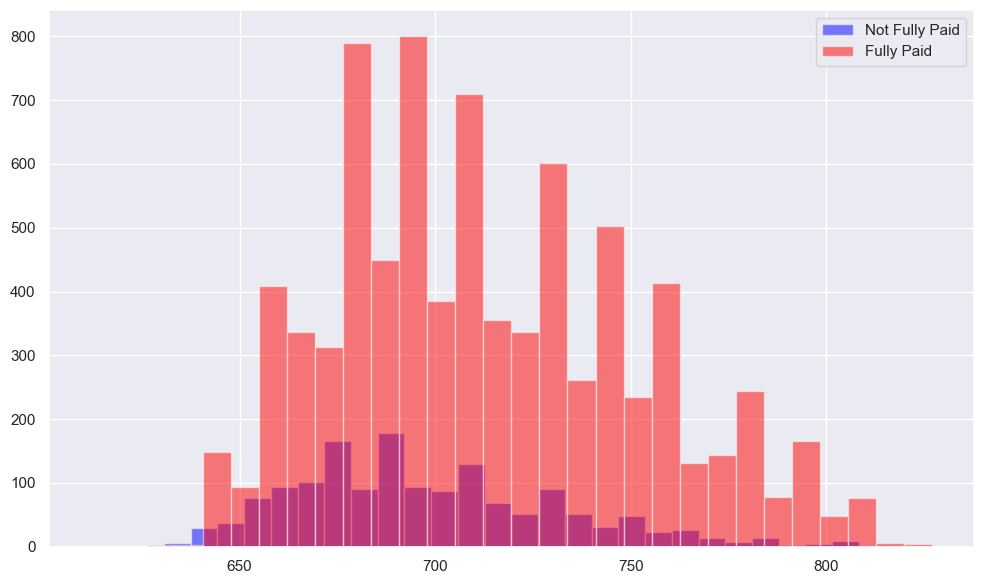

In [390]:
plt.figure(figsize=(10,6))
ax = loans[loans['not.fully.paid'] == 1]['fico'].hist(bins=30,color='Blue', alpha=0.5, label='Not Fully Paid')
loans[loans['not.fully.paid'] == 0]['fico'].hist(bins=30, ax=ax, color='Red',alpha=0.5, label='Fully Paid')
plt.legend()
plt.tight_layout()

**Loans by purpose counts**

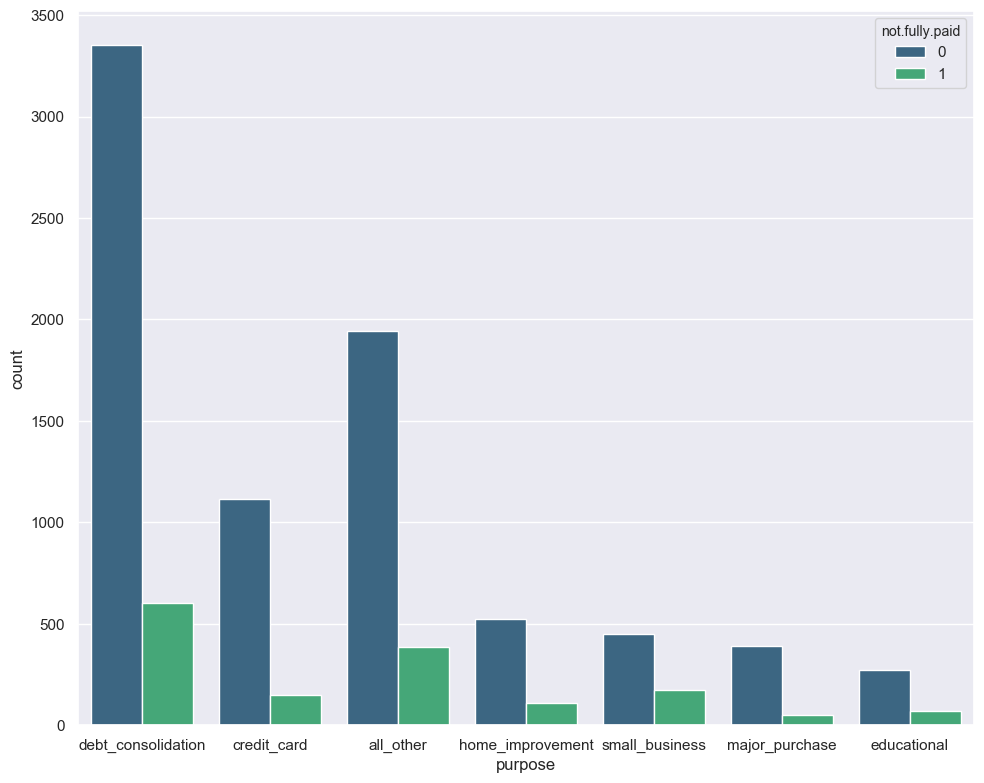

In [391]:
plt.figure(figsize=(10,8))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid', palette='viridis')
plt.tight_layout()

**Trend between FICO score and interest rate**

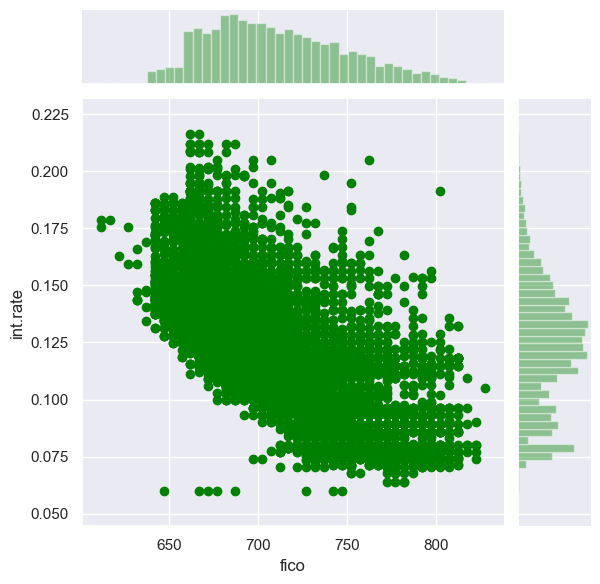

In [392]:
sns.jointplot(data=loans, x='fico', y='int.rate', color='green')

**Trend differed between not.fully.paid and credit.policy**

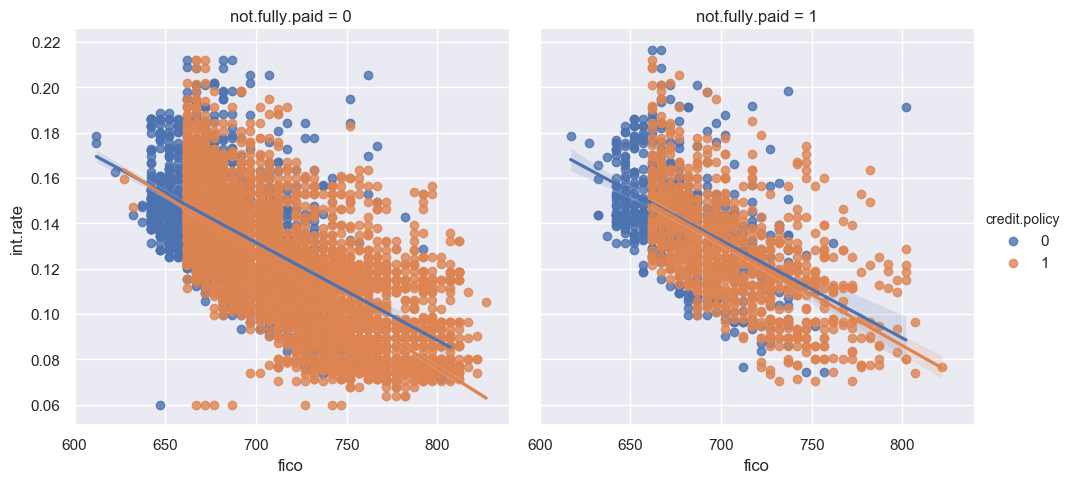

In [393]:
sns.lmplot(x='fico',y='int.rate',data=loans, hue='credit.policy', col='not.fully.paid')

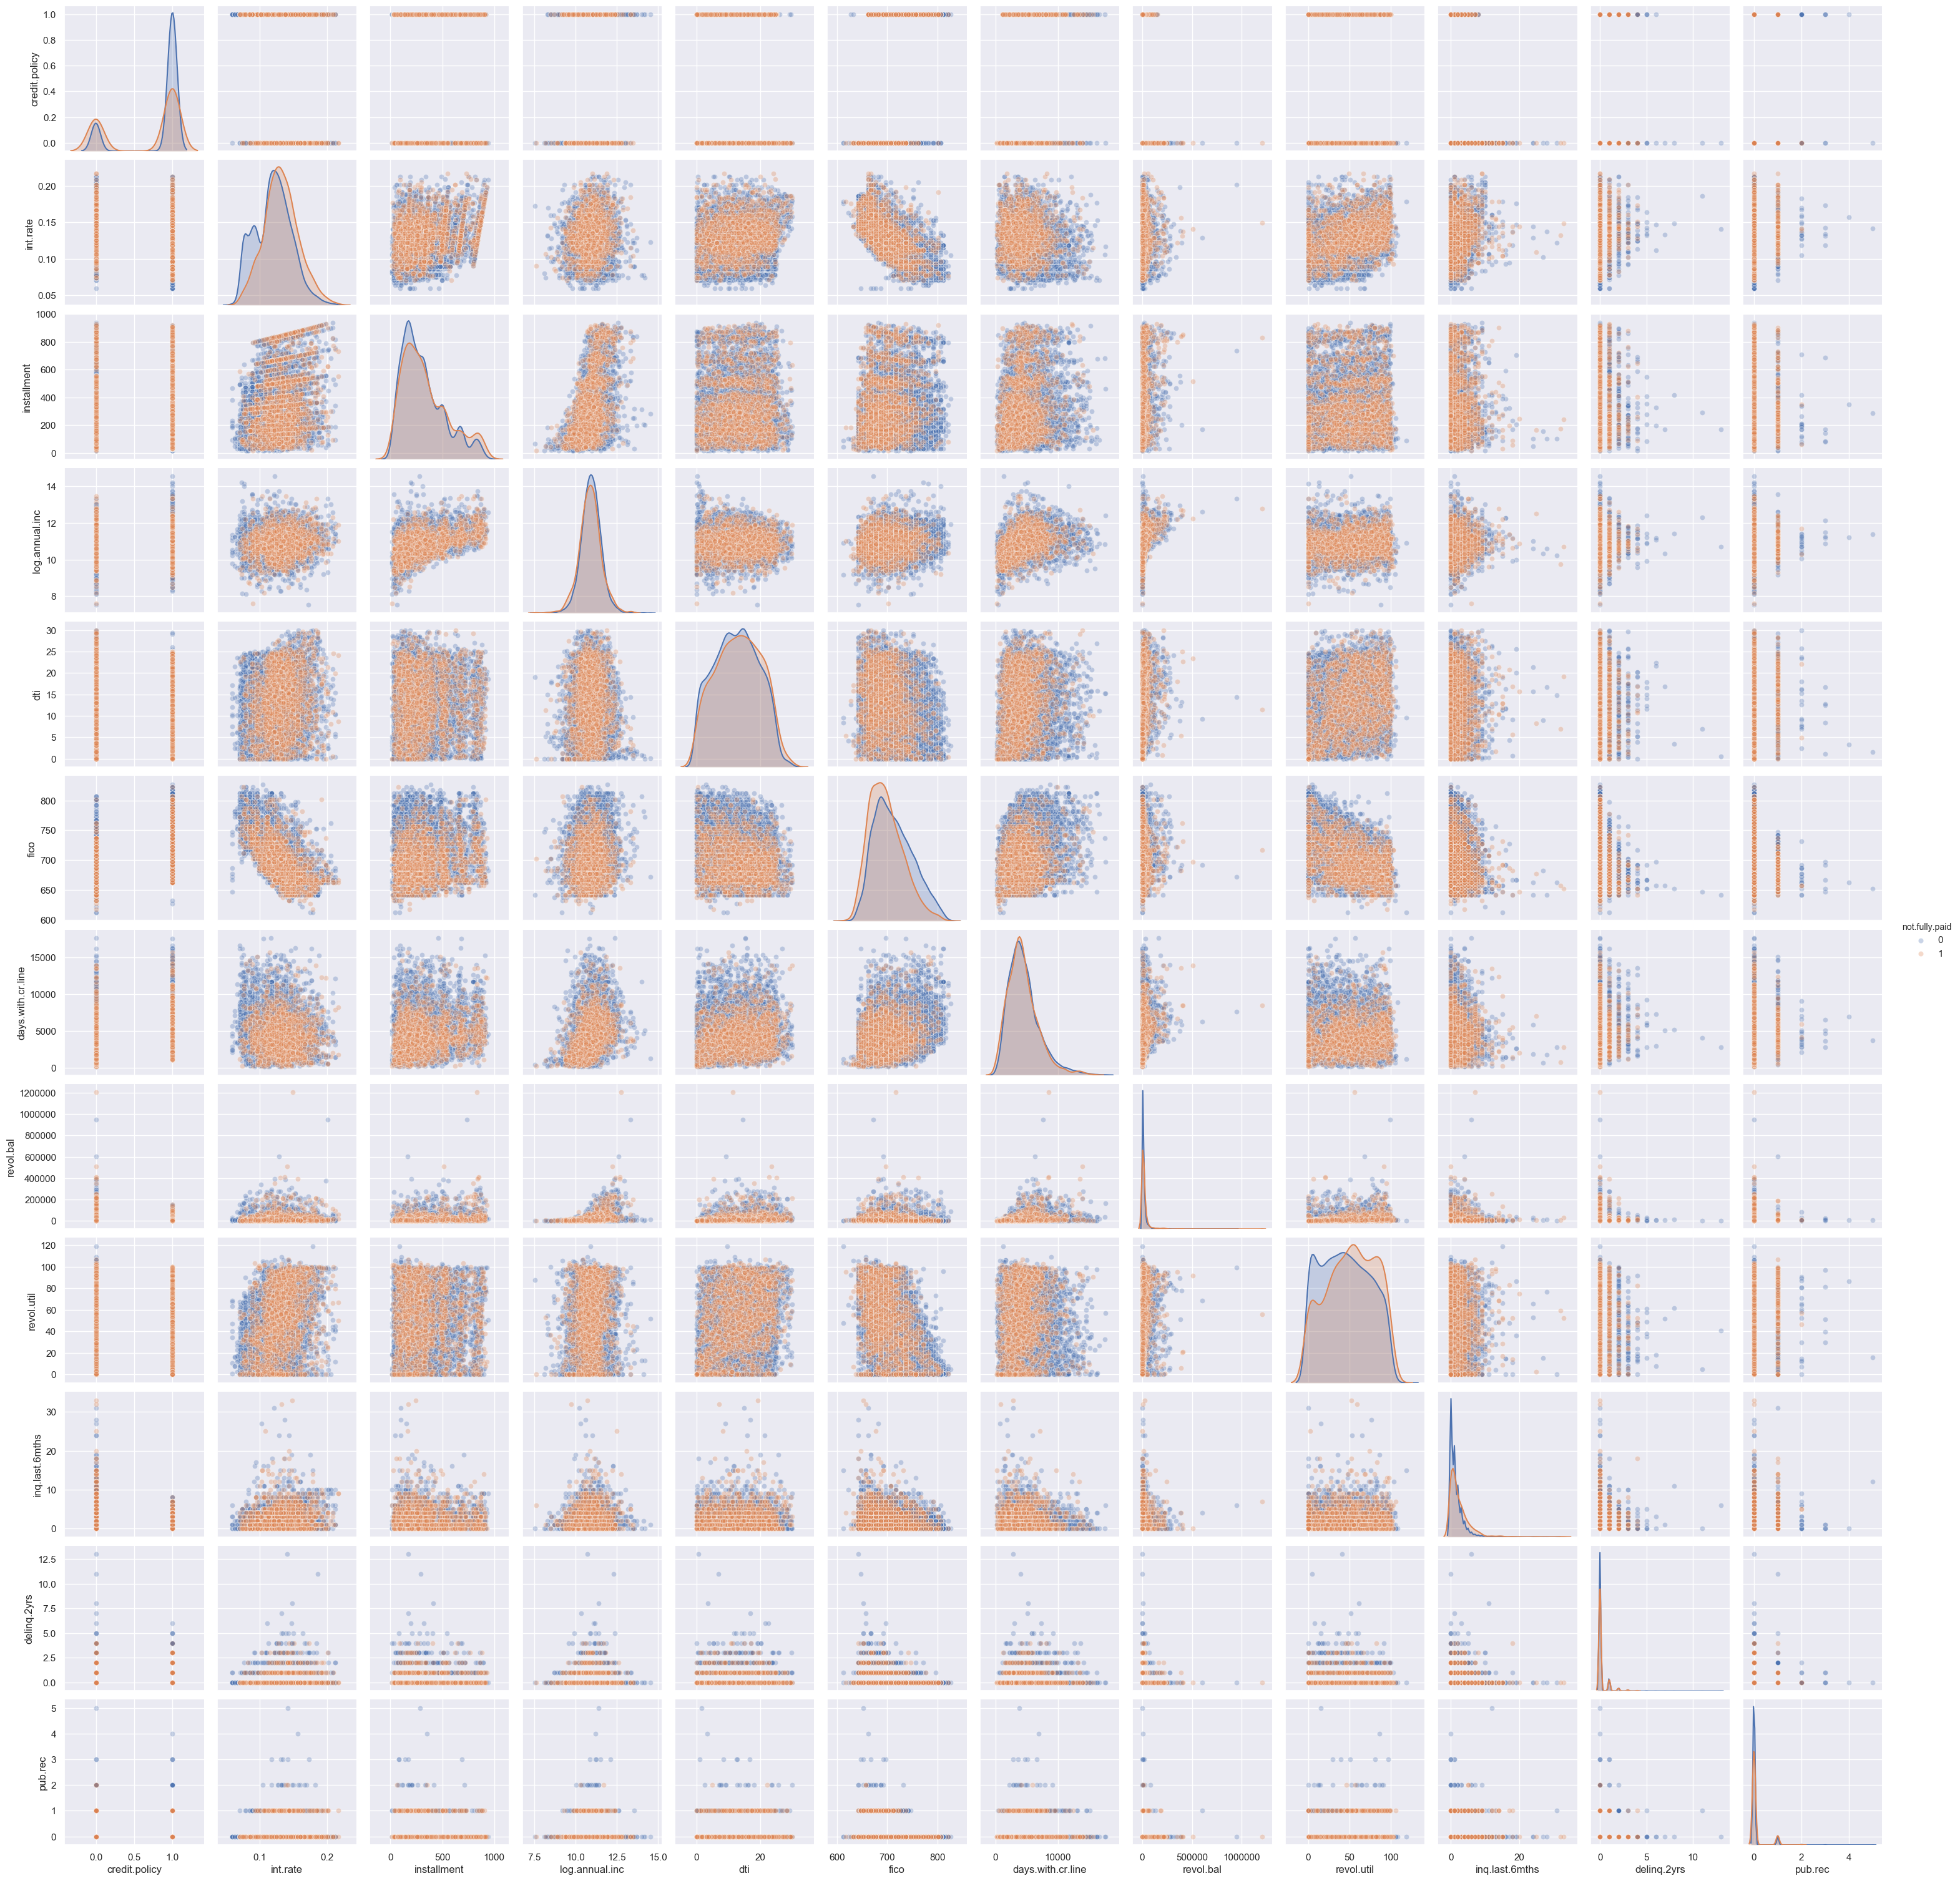

In [394]:
sns.pairplot(data=loans, hue='not.fully.paid', plot_kws={'alpha':0.3})

In [395]:
corr = loans.corr()
corr['not.fully.paid'] = corr['not.fully.paid'].apply(lambda x: abs(x))
most_corrwith_policy = corr.sort_values(by='not.fully.paid',ascending=False).head(8).index
print(f'The most correlated with not.fully.paid features are {list(most_corrwith_policy.values)}')

The most correlated with not.fully.paid features are ['not.fully.paid', 'int.rate', 'credit.policy', 'fico', 'inq.last.6mths', 'revol.util', 'revol.bal', 'installment']


**The most correlated features are inq.last.6mths, fico, int.rate, revol.bal**

## Categorical Features

**The purpose column is categorical, transform it using pd.get_dummies.**

In [396]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [397]:
cat_feats = ['purpose']

In [398]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [399]:
final_data.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                    0                           1   
1        0               0                    1                           0   
2        0               0                    0                           1   
3        0               0                    0                           1   
4        0               0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

## Train Test Split

In [400]:
from imblearn.over_sampling import BorderlineSMOTE

In [401]:
from sklearn.model_selection import train_test_split

In [402]:
selected_features = ['int.rate', 'credit.policy', 'fico', 'inq.last.6mths', 'revol.util', 'revol.bal', 'installment']
X = final_data[selected_features]; y = final_data['not.fully.paid']

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=41)

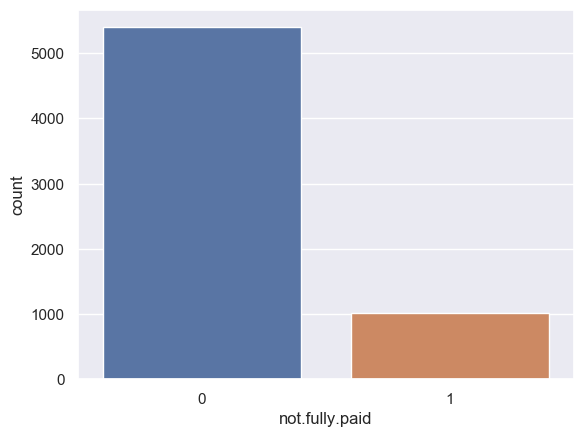

In [404]:
sns.countplot(y_train)

In [405]:
ros = BorderlineSMOTE(random_state=5)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

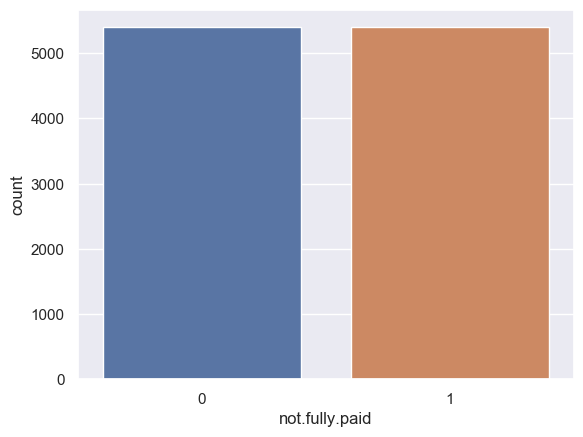

In [406]:
sns.countplot(y_train_resampled)

In [407]:
X_train = X_train_resampled; y_train = y_train_resampled

## Training a Decision Tree Model

In [408]:
from sklearn.tree import DecisionTreeClassifier

In [409]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [410]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [411]:
print(f'number of leaves: {dtree.get_n_leaves()}; depth: {dtree.get_depth()}')

number of leaves: 1236; depth: 20


In [412]:
dtree.decision_path(X_train)

<10800x2471 sparse matrix of type '<class 'numpy.int64'>'
	with 167934 stored elements in Compressed Sparse Row format>

## Predictions and Evaluation of Decision Tree
**a classification report and a confusion matrix.**

In [374]:
y_predict = dtree.predict(X_test)

In [375]:
compare = y_test.to_frame()
compare['Predicted'] = y_predict

In [376]:
compare.sort_index(inplace=True)

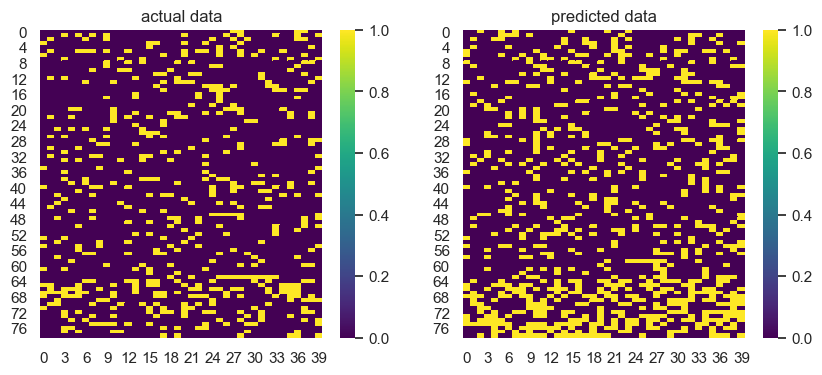

In [377]:
actual = compare['not.fully.paid'][:-1].values.reshape([79,40])
predic = compare['Predicted'][:-1].values.reshape([79,40])

fig, ax =plt.subplots(1,2)
ax[0].set_title('actual data')
ax[1].set_title('predicted data')
fig.set_size_inches(w=10,h=4)
sns.heatmap(actual,ax=ax[0],cmap='viridis')
sns.heatmap(predic,ax=ax[1],cmap='viridis')

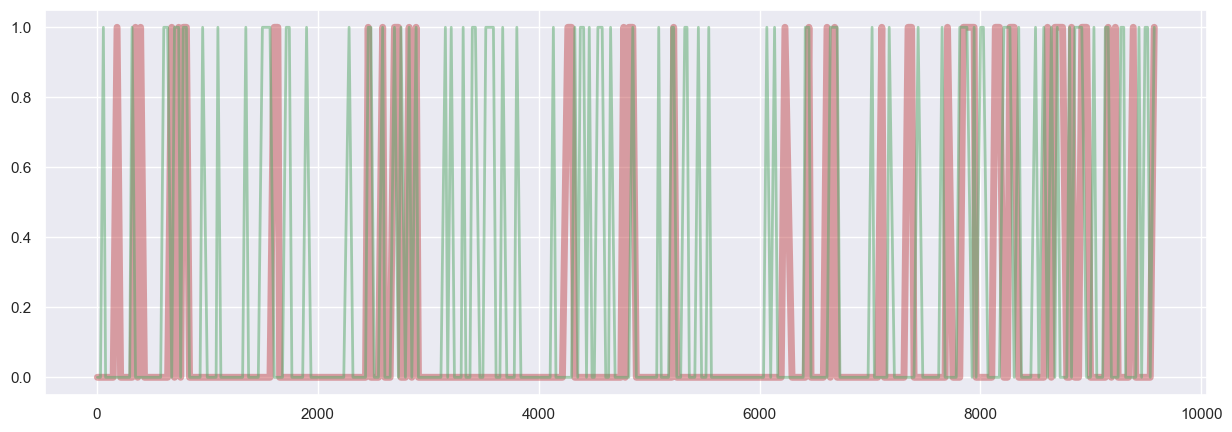

In [378]:
plt.figure(figsize=(15,5))
plt.plot(compare['not.fully.paid'][::10], 'r',linewidth=5, alpha=0.5)
plt.plot(compare['Predicted'][::10], 'g', linewidth=2, alpha=0.5)

In [379]:
from sklearn.metrics import classification_report, confusion_matrix

In [380]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      2645
           1       0.21      0.32      0.26       516

    accuracy                           0.70      3161
   macro avg       0.53      0.55      0.53      3161
weighted avg       0.75      0.70      0.72      3161

[[2035  610]
 [ 350  166]]


In [370]:
#from sklearn.tree import export_graphviz

In [304]:
#export_graphviz(dtree, out_file="decision_tree.dot", rounded=True, filled=True)

## Training the Random Forest model

In [271]:
from sklearn.ensemble import RandomForestClassifier

In [277]:
for i in range(1,10):
    rdree = RandomForestClassifier(n_estimators=i*100)
    rdree.fit(X_train,y_train)
    score = rdree.score(X_test,y_test)
    print(f'# of trees: {i*100} score: {score}')

# of trees: 10 score: 0.7507118000632711
# of trees: 20 score: 0.7548244226510598
# of trees: 30 score: 0.750395444479595
# of trees: 40 score: 0.7529262891490035
# of trees: 50 score: 0.7545080670673837
# of trees: 60 score: 0.750079088895919
# of trees: 70 score: 0.7522935779816514
# of trees: 80 score: 0.7494463777285669
# of trees: 90 score: 0.7507118000632711


In [258]:
rdree.score

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [259]:
y_predict_rdtree = rdree.predict(X_test)

In [260]:
compare['Predicted Random Forest'] = y_predict_rdtree
compare.sort_index(inplace=True)

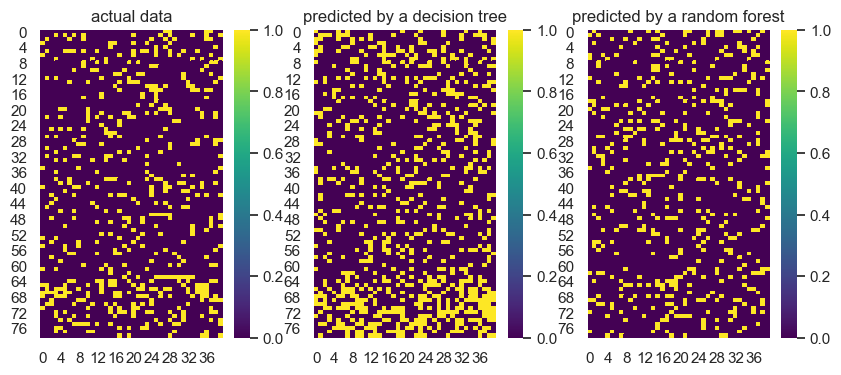

In [261]:
actual = compare['not.fully.paid'][:-1].values.reshape([79,40])
predic_DT = compare['Predicted'][:-1].values.reshape([79,40])
predic_RF = compare['Predicted Random Forest'][:-1].values.reshape([79,40])

fig, ax =plt.subplots(1,3)
ax[0].set_title('actual data')
ax[1].set_title('predicted by a decision tree')
ax[2].set_title('predicted by a random forest')
fig.set_size_inches(w=10,h=4)
sns.heatmap(actual,ax=ax[0],cmap='viridis')
sns.heatmap(predic_DT,ax=ax[1],cmap='viridis')
sns.heatmap(predic_RF,ax=ax[2],cmap='viridis')

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [134]:
print('Decision Trees:')
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print('\nRandom Forest:')
print(classification_report(y_test,y_predict_rdtree))
print(confusion_matrix(y_test,y_predict_rdtree))

Decision Trees:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      2650
           1       0.21      0.34      0.26       511

    accuracy                           0.68      3161
   macro avg       0.53      0.54      0.53      3161
weighted avg       0.75      0.68      0.71      3161

[[1980  670]
 [ 338  173]]

Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2650
           1       0.26      0.25      0.25       511

    accuracy                           0.76      3161
   macro avg       0.56      0.55      0.56      3161
weighted avg       0.76      0.76      0.76      3161

[[2280  370]
 [ 384  127]]
